In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
url ='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df = pd.read_csv(url, header=None)

In [3]:
headers = ['symboling',
'normalized-losses',
'make',
'fuel-type',
'aspiration',
'num-of-doors',
'body-style',
'drive-wheels',
'engine-location',
'wheel-base',
'length',
'width',
'height',
'curb-weight',
'engine-type',
'num-of-cylinders',
'engine-size',
'fuel-system',
'bore',
'stroke',
'compression-ratio',
'horsepower',
'peak-rpm',
'city-mpg',
'highway-mpg',
'price'
]

df.columns = headers
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
df.replace('?', np.nan, inplace=True)

In [5]:
df['price'] = df['price'].astype('float')

In [6]:
df.dropna(inplace=True)

### Regressão linear

$$
\hat{y} = a + b X
$$

In [7]:
lm = LinearRegression()

In [8]:
df[['highway-mpg', 'price']]

,highway-mpg,price
3,30,13950.0
4,22,17450.0
6,25,17710.0
8,20,23875.0
10,29,16430.0
...,...,...
200,28,16845.0
201,25,19045.0
202,23,21485.0
203,27,22470.0


In [9]:
X = df[['highway-mpg']]
y = df[['price']]

In [10]:
lm.fit(X,y)

LinearRegression()

In [11]:
y_hat = lm.predict(X) # Estimado para o própri X (treino) => pontos em cima da reta

In [12]:
df2 = df[['highway-mpg', 'price']].copy()

In [13]:
df2['y_hat'] = y_hat
df2

,highway-mpg,price,y_hat
3,30,13950.0,12809.868734
4,22,17450.0,18052.119580
6,25,17710.0,16086.275513
8,20,23875.0,19362.682291
10,29,16430.0,13465.150090
...,...,...,...
200,28,16845.0,14120.431446
201,25,19045.0,16086.275513
202,23,21485.0,17396.838224
203,27,22470.0,14775.712801


In [14]:
X_estimar = pd.DataFrame({'highway-mpg': [47.5]})
y_estimar = lm.predict( X_estimar )

In [20]:
y_estimar

array([[1342.44500905]])

In [15]:
a = lm.intercept_
b = lm.coef_

In [16]:
xx = np.linspace( X.min(), X.max(), 100  )
yy = a + b*xx

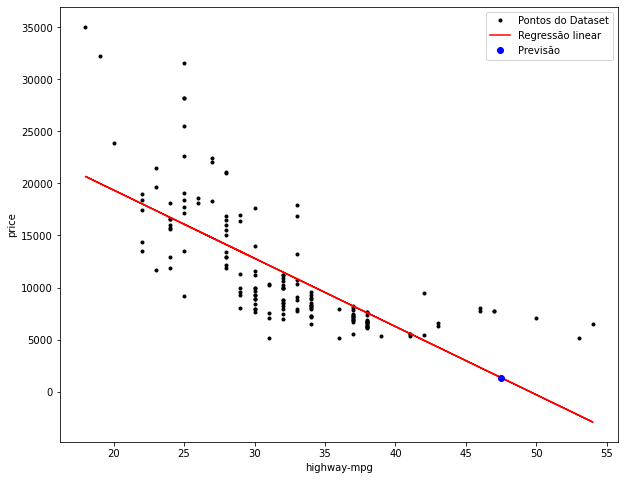

In [17]:
plt.figure(figsize=(10,8))
plt.plot(df2['highway-mpg'], df2['price'], 'k.', label = 'Pontos do Dataset');
plt.plot(df2['highway-mpg'], df2['y_hat'], 'r', label = 'Regressão linear');
plt.plot(X_estimar['highway-mpg'], y_estimar, 'b.', ms=12, label='Previsão');

plt.xlabel('highway-mpg');
plt.ylabel('price');
plt.legend();

In [21]:
# Métrica R^2
lm.score(X,y)

0.5185297491395178

In [22]:
# Erro médio quadrático
mse = mean_squared_error( y, y_hat )
mse

16529789.914714003

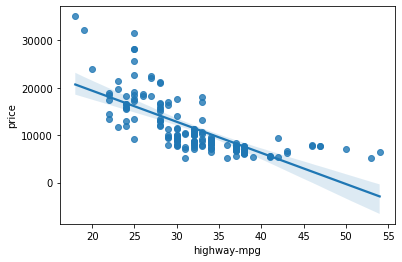

In [23]:
sns.regplot(x='highway-mpg', y='price', data=df);

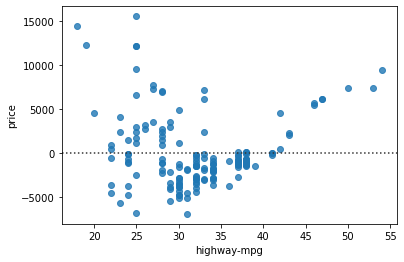

In [24]:
sns.residplot(x='highway-mpg', y='price', data=df);

$$
\hat{Y} = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

In [25]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

In [26]:
lm.fit(X, y)

LinearRegression()

In [27]:
lm.intercept_

-15469.04712032576

In [28]:
lm.coef_

array([20.35983585,  8.25411089, 33.01845058, 22.20517885])

**price** = -15469.04712032576 + 20.35983585 **horsepower** + 8.25411089 **curb-weight** + 33.01845058 **engine-size** + 22.20517885 **highway-mpg**

In [29]:
X_estimar = pd.DataFrame({'horsepower': [100], 'curb-weight': [3000], 'engine-size':[150], 'highway-mpg': [25]})
y_estimar = lm.predict( X_estimar )

In [30]:
y_estimar

array([16837.16619986])

In [31]:
y_hat = lm.predict(X) # Estimado para o próprio X (treino) => pontos em cima do hiperplano

In [32]:
# R^2 
lm.score(X,y)

0.8120659254475683

In [33]:
# mse
mse = mean_squared_error(y, y_hat)
mse

6452134.404183746

### Regressão polinomial

* Quadrático
$$
\hat{y} = a + b_1 X + b_2 X^2
$$

* Cúbico
$$
\hat{y} = a + b_1 X + b_2 X^2 + b_3 X^3
$$

* Alta ordem
$$
\hat{y} = a + b_1 X + b_2 X^2 + b_3 X^3 + \cdots
$$


In [56]:
x = df['highway-mpg']
y = df['price']

f = np.polyfit(x, y, 3)
p = np.poly1d(f)

print(p)

         3         2
-0.5756 x + 95.52 x - 5071 x + 9.325e+04


In [57]:
xx = np.linspace( x.min(), x.max(), 100  )
yy = np.polyval(p, xx) # ou p(xx)

In [58]:
# Não é obrigatório estar no formato do Pandas para usar
X_estimar = pd.DataFrame({'highway-mpg': [47.5]})
y_estimar = np.polyval( p, X_estimar )

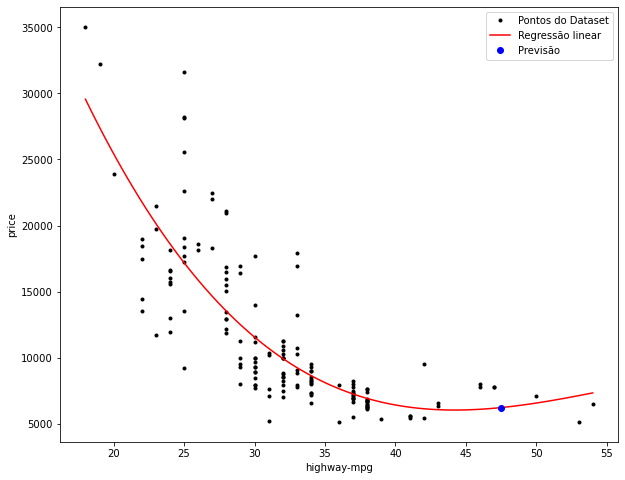

In [59]:
plt.figure(figsize=(10,8))
plt.plot(x, y, 'k.', label = 'Pontos do Dataset');
plt.plot(xx, yy, 'r', label = 'Regressão linear');
plt.plot(X_estimar['highway-mpg'], y_estimar, 'b.', ms=12, label='Previsão');

plt.xlabel('highway-mpg');
plt.ylabel('price');
plt.legend();

In [60]:
y_hat = p(x)

In [61]:
r2 = r2_score(y, y_hat)
r2

0.6628770167074504